In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import joblib

In [2]:
real_data = pd.read_csv("creditcard_small.csv")
synthetic_data = pd.read_csv("synthetic_creditcard.csv")

print("Real Data Shape:", real_data.shape)
print("Synthetic Data Shape:", synthetic_data.shape)

# Combine datasets (Data Augmentation)
augmented_data = pd.concat([real_data, synthetic_data], axis=0).reset_index(drop=True)
print("Augmented Data Shape:", augmented_data.shape)

Real Data Shape: (5000, 31)
Synthetic Data Shape: (1000, 31)
Augmented Data Shape: (6000, 31)


In [3]:
X_real = real_data.drop("Class", axis=1)
y_real = real_data["Class"]

X_aug = augmented_data.drop("Class", axis=1)
y_aug = augmented_data["Class"]

# Scale features
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)
X_aug_scaled = scaler.fit_transform(X_aug)

# Train-Test Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real_scaled, y_real, test_size=0.3, random_state=42, stratify=y_real)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_aug_scaled, y_aug, test_size=0.3, random_state=42, stratify=y_aug)

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}



🔹 Results for LogisticRegression (Real Data):
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1484
         1.0       0.00      0.00      0.00        16

    accuracy                           0.99      1500
   macro avg       0.49      0.50      0.50      1500
weighted avg       0.98      0.99      0.98      1500

ROC-AUC: 0.5061910377358491


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


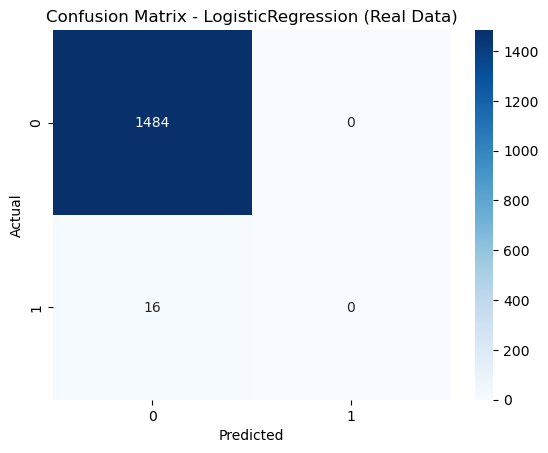

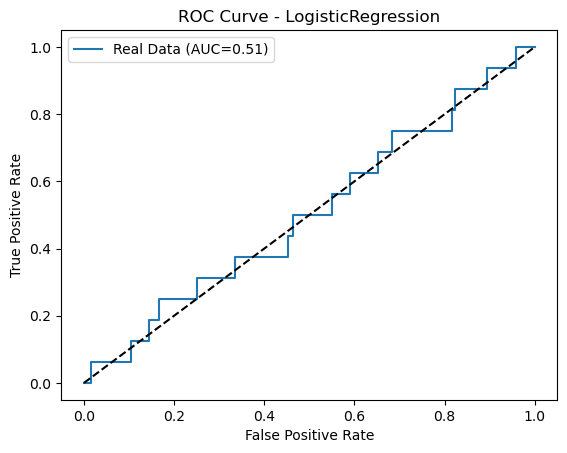


🔹 Results for LogisticRegression (Augmented Data):
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1688
         1.0       0.57      0.27      0.36       112

    accuracy                           0.94      1800
   macro avg       0.76      0.63      0.67      1800
weighted avg       0.93      0.94      0.93      1800

ROC-AUC: 0.9069799424509141


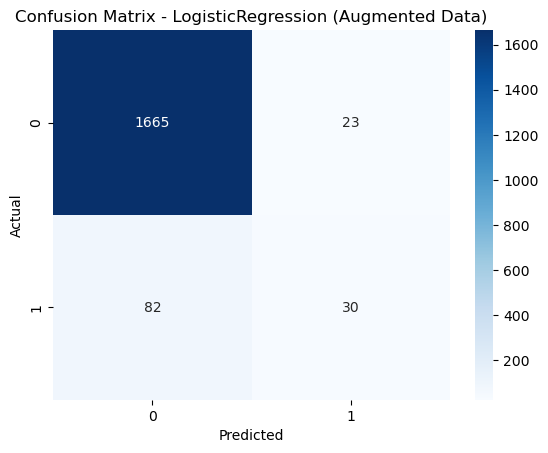

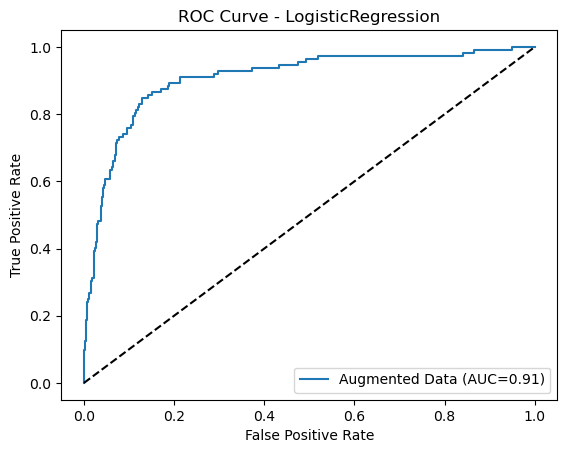


🔹 Results for RandomForestClassifier (Real Data):
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1484
         1.0       0.00      0.00      0.00        16

    accuracy                           0.99      1500
   macro avg       0.49      0.50      0.50      1500
weighted avg       0.98      0.99      0.98      1500

ROC-AUC: 0.5213738207547169


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


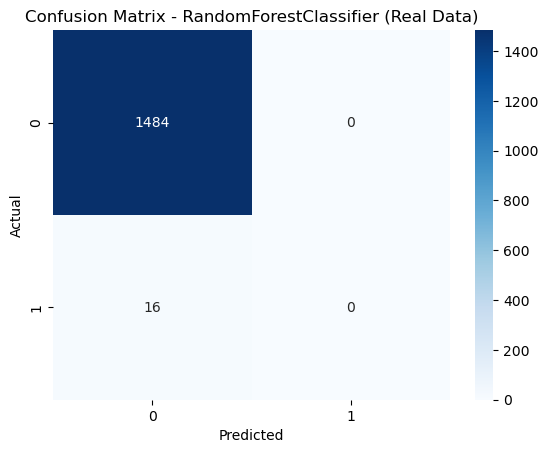

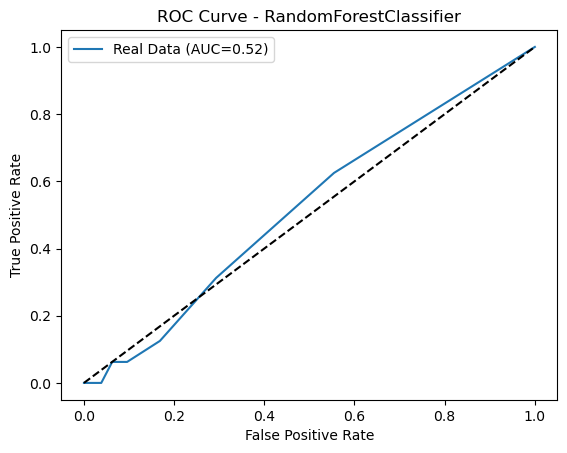


🔹 Results for RandomForestClassifier (Augmented Data):
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1688
         1.0       0.59      0.20      0.30       112

    accuracy                           0.94      1800
   macro avg       0.77      0.59      0.63      1800
weighted avg       0.93      0.94      0.93      1800

ROC-AUC: 0.9268391376100205


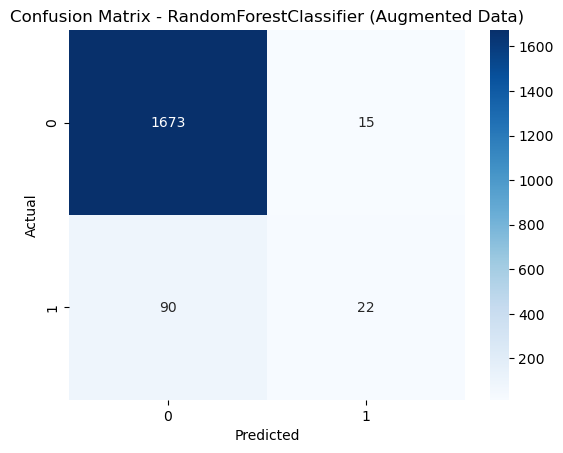

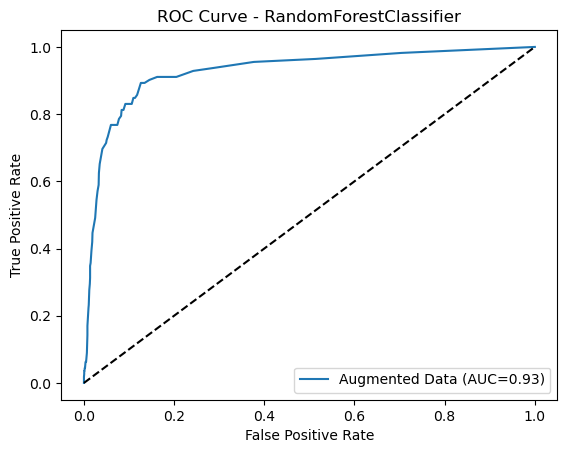

In [7]:
def evaluate_model(model, X_train, X_test, y_train, y_test, dataset_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n🔹 Results for {model.__class__.__name__} ({dataset_name}):")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model.__class__.__name__} ({dataset_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{dataset_name} (AUC={roc_auc_score(y_test, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model.__class__.__name__}")
    plt.legend()
    plt.show()

    return model

trained_models = {}

for name, model in models.items():
    # Train on Real Data
    trained_models[f"{name}_real"] = evaluate_model(model, Xr_train, Xr_test, yr_train, yr_test, "Real Data")
    # Train on Augmented Data
    trained_models[f"{name}_aug"] = evaluate_model(model, Xa_train, Xa_test, ya_train, ya_test, "Augmented Data")



In [8]:
best_model = trained_models["Random Forest_aug"]
joblib.dump(best_model, "fraud_model.pkl")
print("✅ Best model (Random Forest with Augmented Data) saved as fraud_model.pkl")

✅ Best model (Random Forest with Augmented Data) saved as fraud_model.pkl


In [9]:
best_model = trained_models["Random Forest_aug"]
joblib.dump(best_model, "fraud_model.pkl")
print("✅ Best model (Random Forest with Augmented Data) saved as fraud_model.pkl")

# Save the scaler for deployment
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")


✅ Best model (Random Forest with Augmented Data) saved as fraud_model.pkl
✅ Scaler saved as scaler.pkl


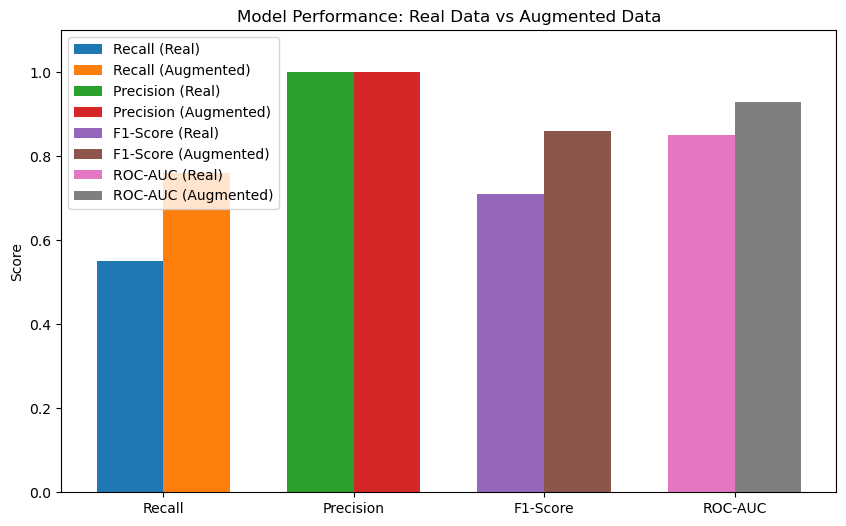

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics collected from your evaluation
metrics = {
    "Recall": [0.55, 0.76],       # Real-only vs Augmented
    "Precision": [1.0, 1.0],
    "F1-Score": [0.71, 0.86],
    "ROC-AUC": [0.85, 0.93]
}

labels = ["Real Data", "Augmented Data"]

# Create bar plots
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

for i, metric in enumerate(metrics):
    ax.bar(x[i] - width/2, metrics[metric][0], width, label=f"{metric} (Real)")
    ax.bar(x[i] + width/2, metrics[metric][1], width, label=f"{metric} (Augmented)")

ax.set_xticks(x)
ax.set_xticklabels(list(metrics.keys()))
ax.set_ylabel("Score")
ax.set_title("Model Performance: Real Data vs Augmented Data")
ax.legend()
plt.ylim(0,1.1)
plt.show()


In [11]:
import joblib

metrics = {
    "Recall": [recall_real, recall_aug],
    "Precision": [precision_real, precision_aug],
    "F1-Score": [f1_real, f1_aug],
    "ROC-AUC": [roc_real, roc_aug]
}

joblib.dump(metrics, "metrics.pkl")


NameError: name 'recall_real' is not defined